# Problem 1

**Restricted Boltzmann Machine:**

We denote the visible features as **v** and the hidden features as **h** .The network of weights between them is **W** with the biases **c** and **b**. 

Defining the energy over v and h as:

$E(\mathbf{v}, \mathbf{h}) =-\mathbf{h}^{\top} \mathbf{W} \mathbf{v}-\mathbf{c}^{\top} \mathbf{v}-\mathbf{b}^{\top} \mathbf{h} \\ =-\sum_{j} \sum_{k} W_{j, k} h_{j} v_{k}-\sum_{k} c_{k} v_{k}-\sum_{j} b_{j} h_{j}$

This translates directly to the following free energy formula:
$\mathcal{F}(v)= - c'v - \sum_i \log \sum_{h_i} e^{h_i (b_i + W_i v)}$

Joint probability over v and h is:

$p(\mathbf{v}, \mathbf{h}) =\exp (-E(\mathbf{v}, \mathbf{h})) / Z \\ =\exp (\mathbf{h}^{T} \mathbf{W} \mathbf{v}+\mathbf{c}^{T} \mathbf{v}+\mathbf{b}^{T} \mathbf{h}) / Z \\=\exp \left(\mathbf{h}^{\top} \mathbf{W} \mathbf{v}) \exp(\mathbf{c}^{T} \mathbf{v}) \exp (\mathbf{b}^{T} \mathbf{h}) / Z \\ =\prod_{j} \prod_{k} \exp (W_{j, k} h_{j} v_{k}\right) \prod_{k} \exp (c_{k} v_{k}) \prod_{j} \exp (b_{j} h_{j})$


Because of the specific structure of RBMs, visible and hidden units are conditionally independent. Thus we can say:

$p(h|v) = \prod_i p(h_i|v) \\
p(v|h) = \prod_j p(v_j|h)$

RBMs with binary units:
$P(h_i=1|v) = \sigma(b_i + W_i v) \\
P(v_j=1|h) = \sigma(c_j + W'_j h)$

Thus the Free energy term reduces to:

$\mathcal{F}(v)= - c'v - \sum_i \log(1 + e^{(b_i + W_i v)})$


We aim to maximise the log likelihood:

$\frac{1}{N} \sum_{n} \log p(\mathbf{v}^{(n)})$

N represents no. of training examples.

$p(\mathbf{v}) =\sum_{\mathbf{h} \in\{0,1\}^{H}} p(\mathbf{v}, \mathbf{h})=\sum_{\mathbf{h} \in\{0,1\}^{H}} \exp (-E(\mathbf{v}, \mathbf{h})) / Z$

Assuming $\theta$ be the trainable weights and biases(W,c and b) for stochastic gradient descent we will require:


$\mathbf{\frac{\partial -log\ p(v;\theta)}{\partial \theta}
= -\frac{\partial log \sum_h e^{-E(v,h)}}{\partial \theta} + \frac{\partial log\ Z}{\partial \theta}}$


**For the postive phase**:

$-\frac{\partial log \sum_h e^{-E(v,h)}}{\partial \theta}
= - \frac{1}{\sum_h e^{-E(v,h)}} \sum_h \frac{\partial e^{-E(v,h)}}{\partial \theta}
= -\frac{1}{\sum_h e^{-E(v,h)}} \sum_h e^{-E(v,h)} \frac{\partial -E(v,h)}{\partial \theta}$

After moving the first fraction into the summation, we keep applying the chain rule so to cancel out the negative sign.

$\sum_h \frac{e^{-E(v,h)}}{\sum_h e^{-E(v,h)}} \frac{\partial E(v,h)}{\partial \theta}$

Dividing Z from numerator and denominator of the first fraction simutaneouly :


$\sum_h \frac{\frac{e^{-E(v,h)}}{Z}}{\frac{\sum_h e^{-E(v,h)}}{Z}} \frac{\partial E(v,h)}{\partial \theta}
= \sum_h \frac{P(v,h)}{P(v)}\frac{\partial E(v,h)}{\partial \theta}
= \sum_h P(h|v) \frac{\partial E(v,h)}{\partial \theta}$

Thus the final form of the positive phase is:

$E_{h \sim P(h|v)} \frac{\partial E(v,h)}{\partial \theta}$

**For the negative phase** :

$\frac{\partial log\ Z}{\partial \theta} = \frac{1}{Z} \frac{\partial Z}{\partial \theta}$

After substituting $Z=\sum_{x,h} e^{-E(x,h)}$ and applying chain rule:

$= \frac{1}{Z} \sum_{h',v'} \frac{\partial e^{-E(h',v')}}{\partial \theta}
= \frac{1}{Z} \sum_{h',v'} e^{-E(h',v')} \frac{\partial -E(h',v')}{\partial \theta}
= -\frac{1}{Z} \sum_{h',v'} e^{-E(h',v')} \frac{\partial E(h',v')}{\partial \theta}$

Moving the first fraction into summation so to use joint distribution:

$= -\sum_{h',v'} \frac{e^{-E(h',v')}}{Z} \frac{\partial E(h',v')}{\partial \theta}
= -\sum_{h',v'} P(h',v') \frac{\partial E(h',v')}{\partial \theta}$

We get the  final form of negative phase to be:

$-E_{h',v' \sim P(h,v)} \frac{\partial E(h',v')}{\partial \theta}$

We get the following learning rule:

$\mathbf{\frac{\partial -log\ P(v;\theta)}{\partial \theta}
= E_{h \sim P(h|v)} \frac{\partial E(v,h)}{\partial \theta} - E_{h',v' \sim P(h,v)} \frac{\partial E(h',v')}{\partial \theta}}$


The parameter updation rule thus becomes:

$\theta(t) = \theta(t-1) + \eta \frac{\partial log\ P(v)}{\partial \theta(t-1)}$

where $\eta$ is the learning rate.

Even though the positive phase is tractible, the negative phase is intractible as there are infinite free choices over v and h. Thus we use**Contrastive Divergence Algorithm** to solve this problem.

Replace estimation over $(\mathbf v)$ by a point estimation at $\tilde{\mathbf v}\sim p(\mathbf v)$ obtained from Gibbs sampling starting at $\mathbf v^{(t)}$

sample $(\mathbf h^1\sim p(\mathbf h|\mathbf v^{(t)})$


sample $(\mathbf v^1\sim p(\mathbf v|\mathbf h^1)$

This goes on till..

sample $(\mathbf h^k\sim p(\mathbf h|\mathbf v^{(k-1)})$


sample $(\mathbf v \tilde \sim p(\mathbf v|\mathbf h^{k-1})$

Thus we can write:


$\mathbf{\frac{\partial-log\ P(v;\theta)}{\partial \theta}= E_{\mathbf{h}} [\frac{\partial E(\mathbf{v}^{(t)}, \mathbf{h})}{\partial \theta} | \mathbf{v}^{(t)}]-E_{\mathbf{v}, \mathbf{h}} [\frac{\partial E(\mathbf{v}, \mathbf{h})}{\partial \theta}] \\
=E_{\mathbf{h}}[\frac{\partial E(\mathbf{v}^{(t)}, \mathbf{h})}{\partial \theta} | \mathbf{v}^{(t)}]-E_{\mathbf{h}}[\frac{\partial E(\tilde{\mathbf{v}}, \mathbf{h})}{\partial \theta}]}$

This solves the intractible problem and we can go ahead with parameter updation.

The final update rules are:

$\mathbf{W}=\mathbf{W}+\alpha(\mathbf{h}(\mathbf{v}^{(t)}) \mathbf{v}^{(t)^{T}}-\mathbf{h}(\tilde{\mathbf{v}}) \tilde{\mathbf{v}}^{T})$

$\mathbf{b} = \mathbf{b}+\alpha(\mathbf{h}(\mathbf{v}^{(t)})-\mathbf{h}(\tilde{\mathbf{v}}))$


$\mathbf{c} =\mathbf{c}+\alpha(\mathbf{v}^{(t)}-\tilde{\mathbf{v})}$

where $\mathbf h(\mathbf v) = p(\mathbf h|\mathbf v)$.




In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import keras.datasets 

In [4]:
print(tf.__version__)

2.2.0-rc3


In [0]:
import random
import gzip, struct

class DataSet:
    batch_index = 0
    
    def __init__(self, flag, batch_size = None, one_hot = False, seed = 0):
     
        if flag=='train':
            (X,Y),(_,_)= keras.datasets.mnist.load_data() 
        if flag=='test':
            (_,_),(X,Y)= keras.datasets.mnist.load_data() 
        
        shape = X.shape
        X = X.reshape([shape[0], shape[1] * shape[2]])
        self.X = X.astype(np.float)/255
        self.size = self.X.shape[0]
        if batch_size == None:
            self.batch_size = self.size
        else:
            self.batch_size = batch_size
        # abandom last few samples
        self.batch_num = int(self.size / self.batch_size)
        # shuffle samples
        np.random.seed(seed)
        np.random.shuffle(self.X)
        np.random.seed(seed)
        np.random.shuffle(Y)
        self.one_hot = one_hot
        if one_hot:
            y_vec = np.zeros((len(Y), 10), dtype=np.float)
            for i, label in enumerate(Y):
                y_vec[i, Y[i]] = 1.0
            self.Y = y_vec
        else:
            self.Y = Y
    
    
    def next_batch(self):
        start = self.batch_index * self.batch_size
        end = (self.batch_index + 1) * self.batch_size
        self.batch_index = (self.batch_index + 1) % self.batch_num
        if self.one_hot:
            return self.X[start:end, :], self.Y[start:end, :]
        else:
            return self.X[start:end, :], self.Y[start:end]
        
    def sample_batch(self):
        index = random.randrange(self.batch_num)
        start = index * self.batch_size
        end = (index + 1) * self.batch_size
        if self.one_hot:
            return self.X[start:end, :], self.Y[start:end, :]
        else:
            return self.X[start:end, :], self.Y[start:end]

In [6]:
mnist = DataSet('test', 2)
print('batch index: %d' % mnist.batch_index)
X, Y = mnist.next_batch()
print('batch index: %d' % mnist.batch_index)
print('X:')
print(X)
print('Y:')
print(Y)

11493376/11490434 [==============================] - 1s 0us/step
batch index: 0
batch index: 1
X:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y:
[8 7]


In [0]:
def weight(shape, name='weights'):
    return tf.Variable(tf.random.truncated_normal(shape, stddev=0.1), name=name)

def bias(shape, name='biases'):
    return tf.Variable(tf.constant(0.1, shape=shape), name=name)


In [0]:
class RBM:
    i = 0 # fliping index for computing pseudo likelihood
    
    def __init__(self, n_hidden, n_visible=784, k=30, momentum=False):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.k = k
        
        self.lr = tf.compat.v1.placeholder(tf.float32)
        if momentum:
            self.momentum = tf.compat.v1.placeholder(tf.float32)
        else:
            self.momentum = 0.0
        self.w = weight([n_visible, n_hidden], 'w')
        self.hb = bias([n_hidden], 'hb')
        self.vb = bias([n_visible], 'vb')
        
        self.w_v = tf.Variable(tf.zeros([n_visible, n_hidden]), dtype=tf.float32)
        self.hb_v = tf.Variable(tf.zeros([n_hidden]), dtype=tf.float32)
        self.vb_v = tf.Variable(tf.zeros([n_visible]), dtype=tf.float32)
        
    def propup(self, visible):
        pre_sigmoid_activation = tf.matmul(visible, self.w) + self.hb
        return tf.nn.sigmoid(pre_sigmoid_activation)
    
    def propdown(self, hidden):
        pre_sigmoid_activation = tf.matmul(hidden, tf.transpose(self.w)) + self.vb
        return tf.nn.sigmoid(pre_sigmoid_activation)
    
    def sample_h_given_v(self, v_sample):
        h_props = self.propup(v_sample)
        h_sample = tf.nn.relu(tf.sign(h_props - tf.random.uniform(tf.shape(h_props))))
        return h_sample
    
    def sample_v_given_h(self, h_sample):
        v_props = self.propdown(h_sample)
        v_sample = tf.nn.relu(tf.sign(v_props - tf.random.uniform(tf.shape(v_props))))
        return v_sample
    
    def CD_k(self, visibles):       
        # k steps gibbs sampling
        v_samples = visibles
        h_samples = self.sample_h_given_v(v_samples)
        for i in range(self.k):
            v_samples = self.sample_v_given_h(h_samples)
            h_samples = self.sample_h_given_v(v_samples)
        
        h0_props = self.propup(visibles)
        w_positive_grad = tf.matmul(tf.transpose(visibles), h0_props)
        w_negative_grad = tf.matmul(tf.transpose(v_samples), h_samples)
        w_grad = (w_positive_grad - w_negative_grad) / tf.compat.v1.to_float(tf.shape(visibles)[0])
        hb_grad = tf.reduce_mean(h0_props - h_samples, 0)
        vb_grad = tf.reduce_mean(visibles - v_samples, 0)
        return w_grad, hb_grad, vb_grad
    
    def learn(self, visibles):
        w_grad, hb_grad, vb_grad = self.CD_k(visibles)
        # compute new velocities
        new_w_v = self.momentum * self.w_v + self.lr * w_grad
        new_hb_v = self.momentum * self.hb_v + self.lr * hb_grad
        new_vb_v = self.momentum * self.vb_v + self.lr * vb_grad
        # update parameters
        update_w = tf.compat.v1.assign(self.w, self.w + new_w_v)
        update_hb = tf.compat.v1.assign(self.hb, self.hb + new_hb_v)
        update_vb = tf.compat.v1.assign(self.vb, self.vb + new_vb_v)
        # update velocities
        update_w_v = tf.compat.v1.assign(self.w_v, new_w_v)
        update_hb_v = tf.compat.v1.assign(self.hb_v, new_hb_v)
        update_vb_v = tf.compat.v1.assign(self.vb_v, new_vb_v)
        
        return [update_w, update_hb, update_vb, update_w_v, update_hb_v, update_vb_v]
        
    def sampler(self, visibles, steps=200):
        v_samples = visibles
        for step in range(steps):
            v_samples = self.sample_v_given_h(self.sample_h_given_v(v_samples))
        return v_samples
    
    def free_energy(self, visibles):
        first_term = tf.matmul(visibles, tf.reshape(self.vb, [tf.shape(self.vb)[0], 1]))
        second_term = tf.reduce_sum(tf.math.log(1 + tf.exp(self.hb + tf.matmul(visibles, self.w))), axis=1)
        return - first_term - second_term
    
    def pseudo_likelihood(self, visibles):
        x = tf.round(visibles)
        x_fe = self.free_energy(x)
        split0, split1, split2 = tf.split(x, [self.i, 1, tf.shape(x)[1] - self.i - 1], 1)
        xi = tf.concat([split0, 1 - split1, split2], 1)
        self.i = (self.i + 1) % self.n_visible
        xi_fe = self.free_energy(xi)
        return tf.reduce_mean(self.n_visible * tf.math.log(tf.nn.sigmoid(xi_fe - x_fe)), axis=0)

In [0]:
def show_images(images, size):
    
    
    img = (images + 1.0) / 2.0
    h, w = img.shape[1], img.shape[2]
    
   
    merge_img = np.zeros((h * size[0], w * size[1]))
    
    
    for idx, image in enumerate(images):
        i = idx % size[1]
        j = idx // size[1]
        merge_img[j*h:j*h+h, i*w:i*w+w] = image

    
    merge_img = (merge_img * 255 / np.max(merge_img)).astype('uint8')
    plt.imshow(merge_img,cmap='gray')
    plt.show()      
    
    return 

In [0]:
def train(train_data,hidden_nodes,epoches):
    
    x = tf.compat.v1.placeholder(tf.float32, shape=[None, 784])
    noise_x, _ = train_data.sample_batch()
    # noise_x = tf.random_normal([train_data.batch_size, 784])
    rbm = RBM(hidden_nodes)
    step = rbm.learn(x)
    sampler = rbm.sampler(x)
    
    saver = tf.compat.v1.train.Saver()
    
    with tf.compat.v1.Session() as sess:
        init = tf.compat.v1.global_variables_initializer()
        sess.run(init)
        #mean_cost = []
        epoch = 1
        for i in range(epoches * train_data.batch_num):
            # draw samples
            if i % train_data.batch_num == 0:
                samples = sess.run(sampler, feed_dict = {x: noise_x})
                samples = samples.reshape([train_data.batch_size, 28, 28])
                show_images(samples, [8, 8])
    
            batch_x, _ = train_data.next_batch()
            sess.run(step, feed_dict = {x: batch_x, rbm.lr: 0.1})
            
            if i is not 0 and train_data.batch_index is 0:
                print('Epoch ', epoch)
                epoch += 1


        print('Testing !')       

        

        x_test,_=test_data.sample_batch()

        x_test1=np.copy(x_test)
        x_test2=np.copy(x_test)
        x_test3=np.copy(x_test)


        l1,l2,l3=[],[],[]
        for j in range(len(x_test)):
            i,= np.nonzero(x_test[j])
            ix1 = np.random.choice(i, int(np.floor(0.2 * len(i))),replace=False)
            ix2 = np.random.choice(i, int(np.floor(0.5 * len(i))),replace=False)
            ix3 = np.random.choice(i, int(np.floor(0.8 * len(i))),replace=False)

            l1.append(ix1)
            l2.append(ix2)
            l3.append(ix3)

        print('After removing 20% pixels')

        j=0
        for ix in l1:
            for loc in ix:
              x_test1[j][loc]=0.0
            j+=1

        samples = sess.run(sampler, feed_dict = {x: x_test1})
        samples = samples.reshape([train_data.batch_size, 28, 28])
        show_images(samples, [8, 8])


        print('After removing 50% pixels')

        j=0
        for ix in l2:
            for loc in ix:
              x_test2[j][loc]=0.0
            j+=1

        samples = sess.run(sampler, feed_dict = {x: x_test2})
        samples = samples.reshape([train_data.batch_size, 28, 28])
        show_images(samples, [8, 8])

        print('After removing 80% pixels')

        j=0
        for ix in l3:
            for loc in ix:
              x_test3[j][loc]=0.0
            j+=1

        samples = sess.run(sampler, feed_dict = {x: x_test3})
        samples = samples.reshape([train_data.batch_size, 28, 28])
        show_images(samples, [8, 8])

In [0]:
train_data = DataSet('train', batch_size=64, one_hot=True)
test_data = DataSet('test', batch_size=64, one_hot=True)

**20 hidden nodes training.**

**Followed by testing: removing 20%, 50% and 80% pixels.**

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.


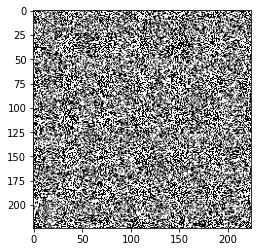

Epoch  1


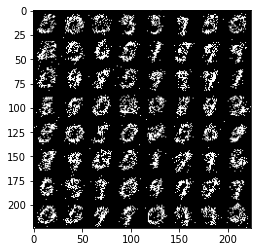

Epoch  2


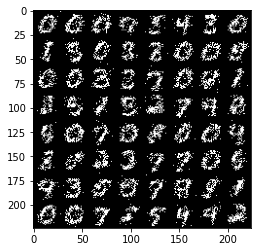

Epoch  3


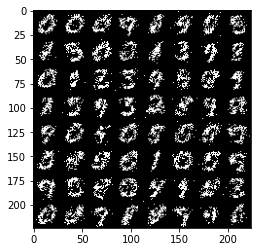

Epoch  4


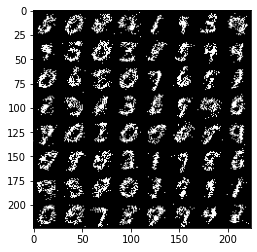

Epoch  5


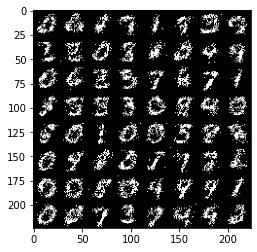

Epoch  6


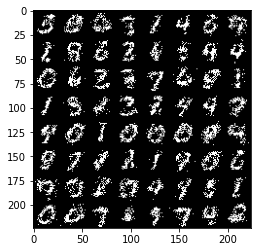

Epoch  7


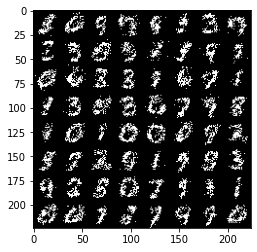

Epoch  8


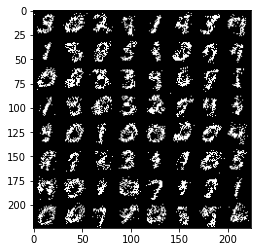

Epoch  9


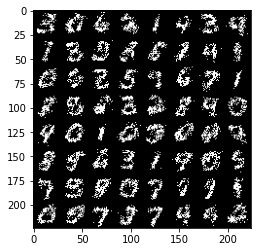

Epoch  10


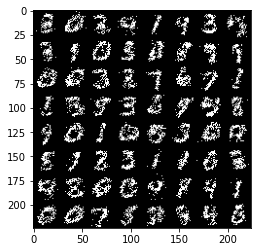

Epoch  11


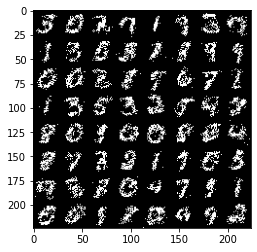

Epoch  12


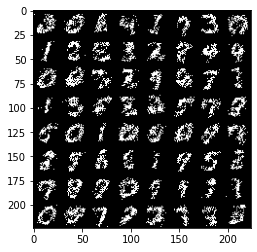

Epoch  13


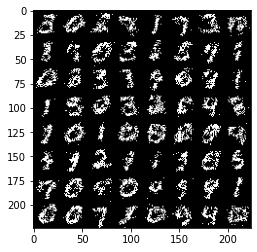

Epoch  14


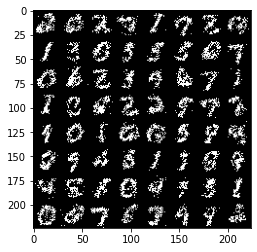

Epoch  15


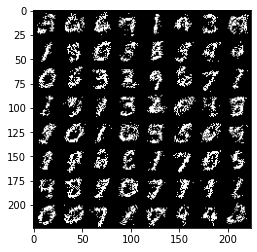

Epoch  16


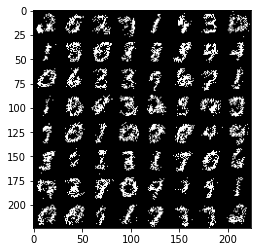

Epoch  17


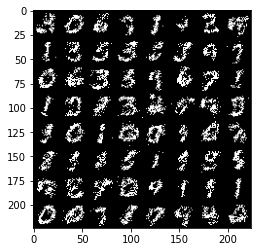

Epoch  18


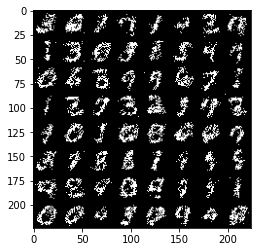

Epoch  19


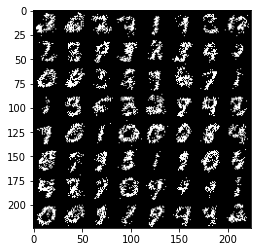

Epoch  20


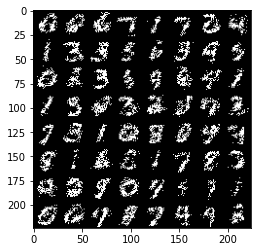

Epoch  21


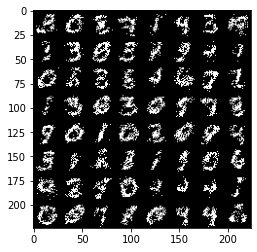

Epoch  22


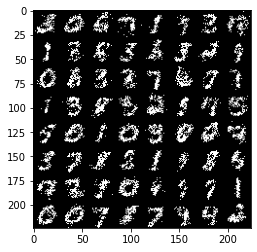

Epoch  23


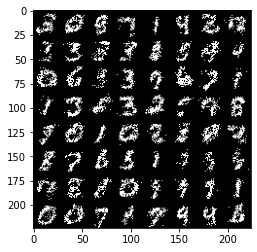

Epoch  24


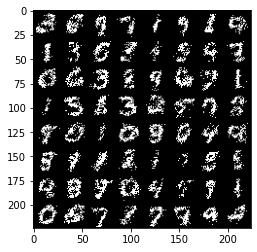

Epoch  25


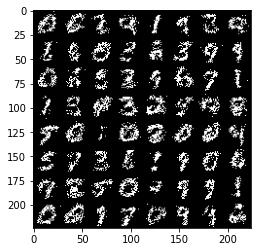

Epoch  26


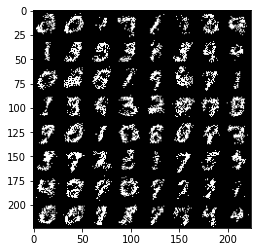

Epoch  27


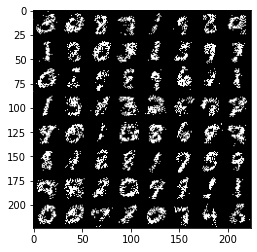

Epoch  28


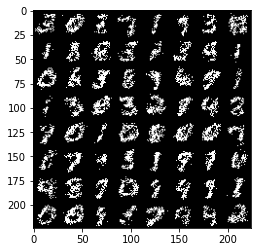

Epoch  29


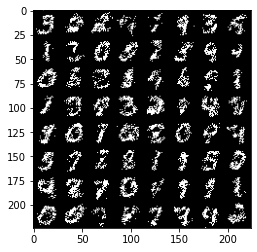

Epoch  30
Testing !
After removing 20% pixels


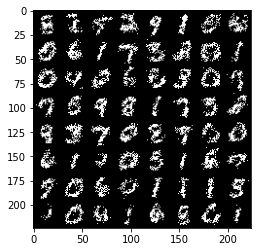

After removing 50% pixels


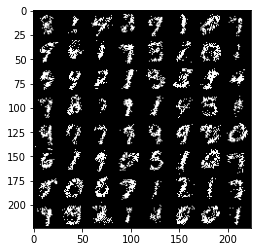

After removing 80% pixels


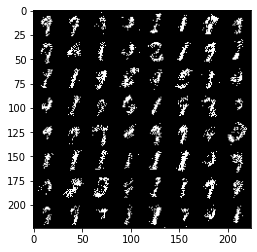

In [20]:
tf.compat.v1.disable_eager_execution()
train(train_data, 20,30)

**100 hidden nodes training.**

**Followed by testing: removing 20%, 50% and 80% pixels.**

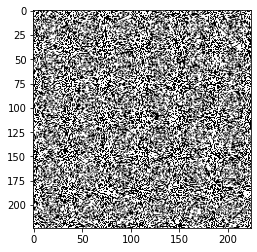

Epoch  1


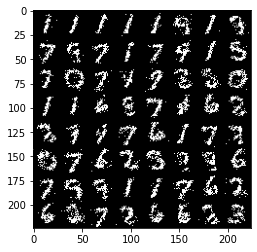

Epoch  2


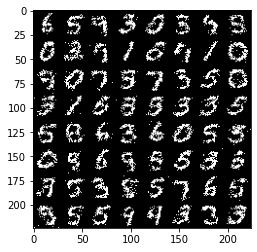

Epoch  3


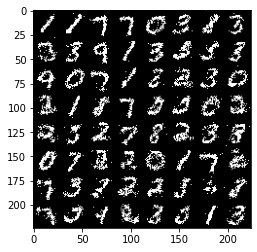

Epoch  4


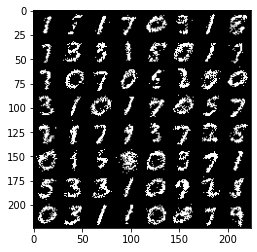

Epoch  5


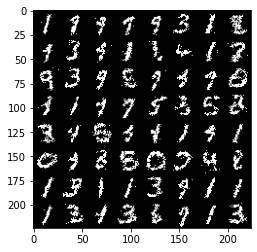

Epoch  6


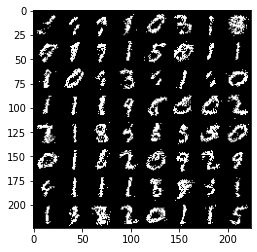

Epoch  7


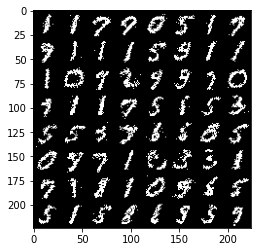

Epoch  8


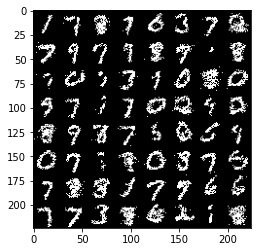

Epoch  9


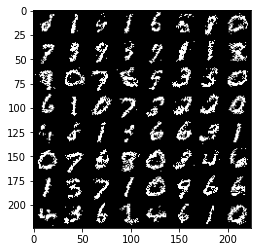

Epoch  10


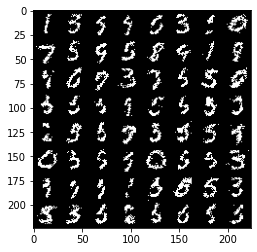

Epoch  11


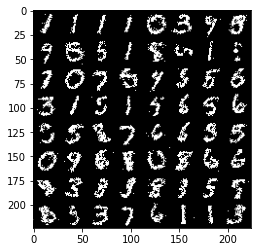

Epoch  12


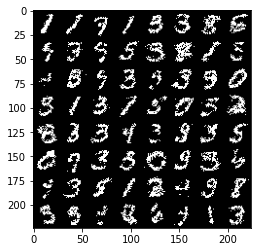

Epoch  13


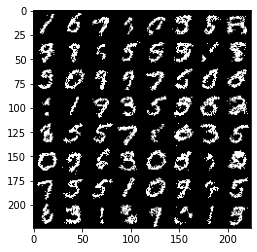

Epoch  14


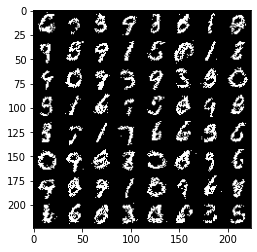

Epoch  15


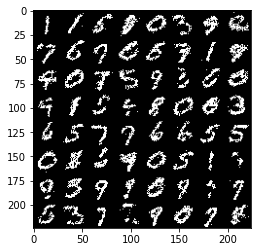

Epoch  16


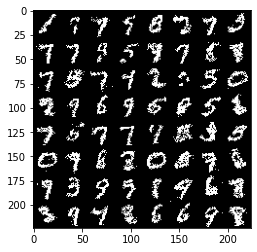

Epoch  17


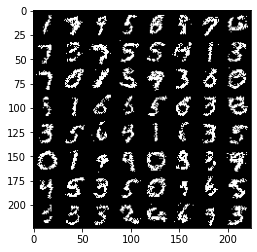

Epoch  18


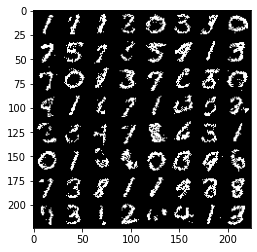

Epoch  19


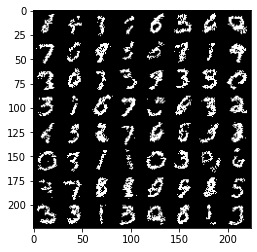

Epoch  20


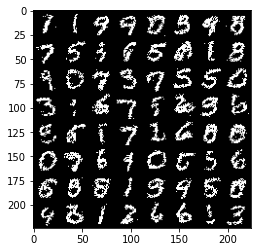

Epoch  21


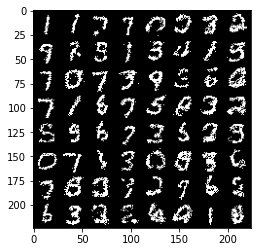

Epoch  22


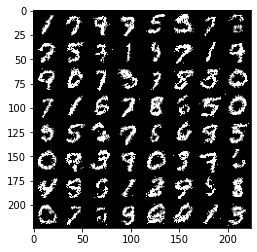

Epoch  23


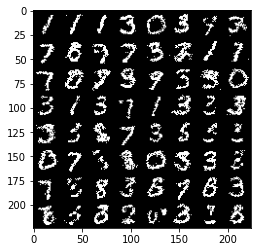

Epoch  24


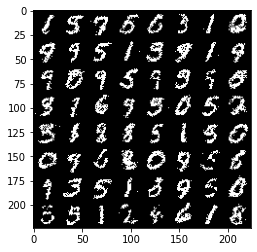

Epoch  25


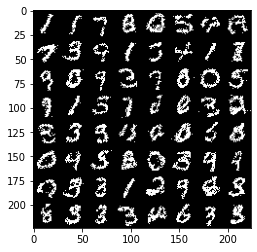

Epoch  26


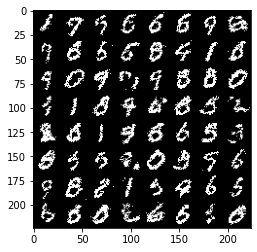

Epoch  27


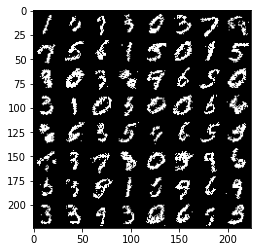

Epoch  28


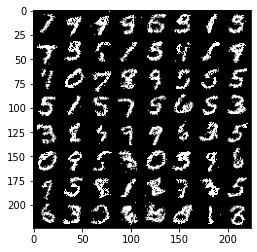

Epoch  29


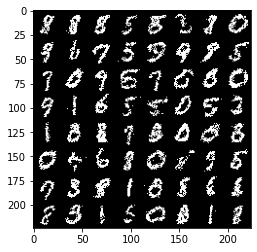

Epoch  30
Testing !
After removing 20% pixels


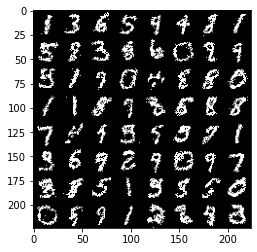

After removing 50% pixels


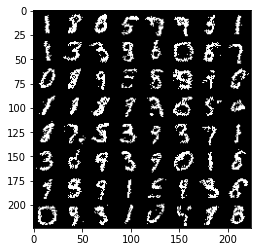

After removing 80% pixels


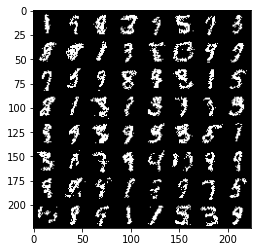

In [21]:
tf.compat.v1.disable_eager_execution()
train(train_data, 100,30)

**500 hidden nodes training.**

**Followed by testing: removing 20%, 50% and 80% pixels.**

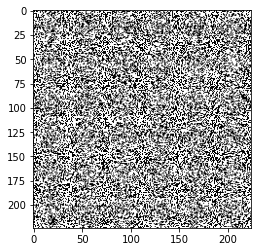

Epoch  1


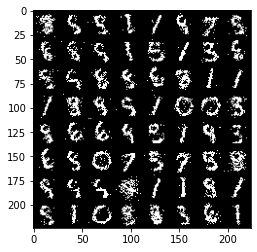

Epoch  2


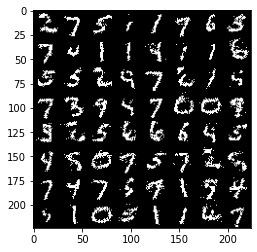

Epoch  3


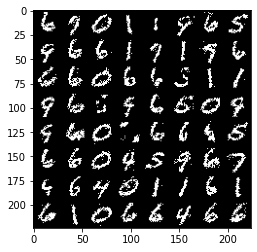

Epoch  4


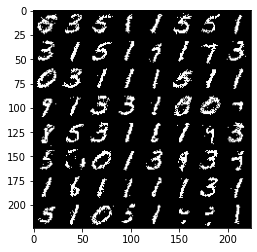

Epoch  5


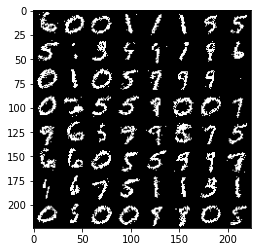

Epoch  6


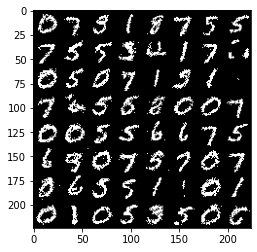

Epoch  7


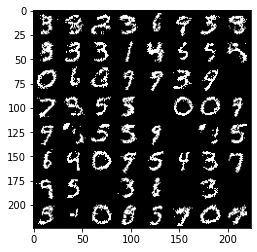

Epoch  8


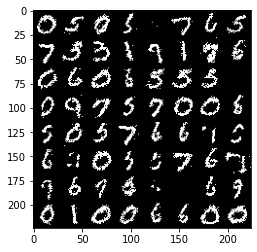

Epoch  9


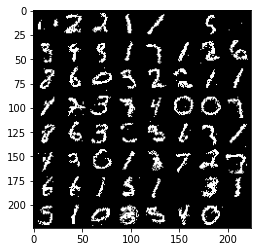

Epoch  10


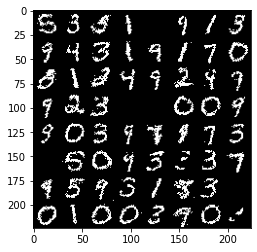

Epoch  11


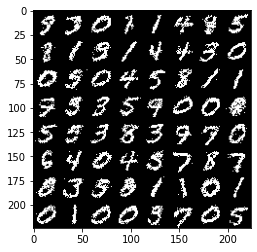

Epoch  12


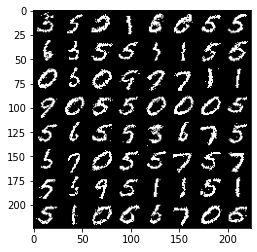

Epoch  13


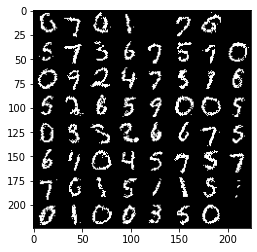

Epoch  14


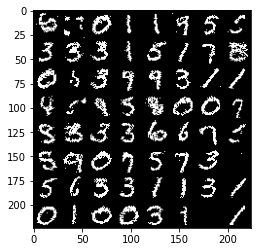

Epoch  15


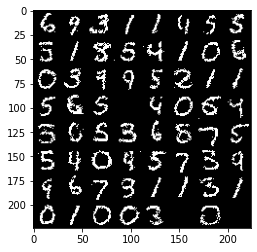

Epoch  16


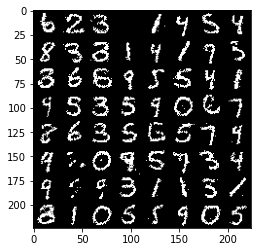

Epoch  17


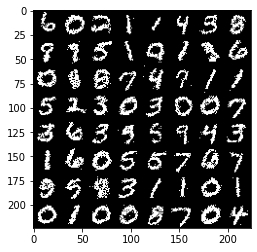

Epoch  18


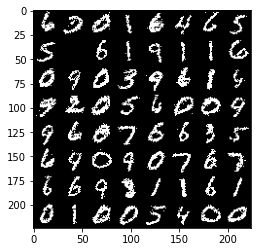

Epoch  19


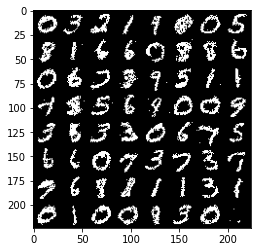

Epoch  20


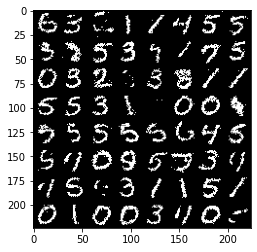

Epoch  21


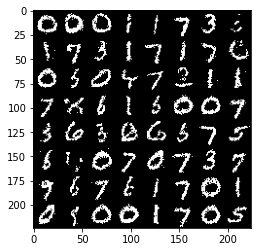

Epoch  22


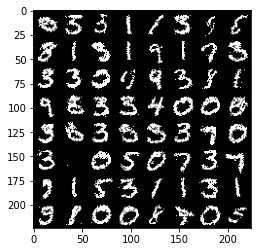

Epoch  23


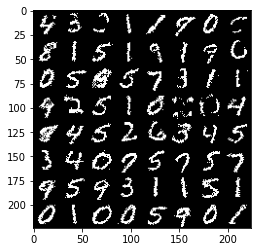

Epoch  24


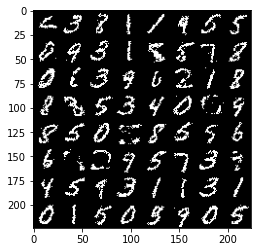

Epoch  25


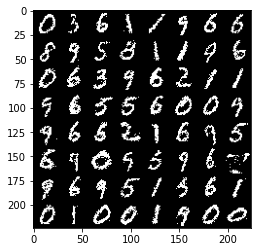

Epoch  26


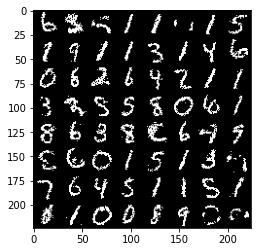

Epoch  27


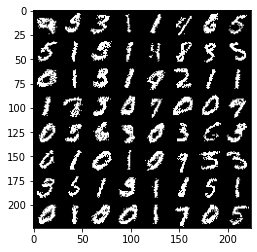

Epoch  28


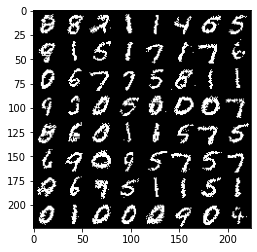

Epoch  29


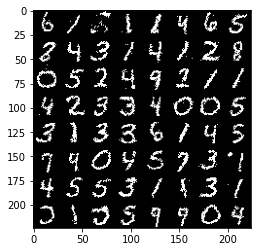

Epoch  30
Testing !
After removing 20% pixels


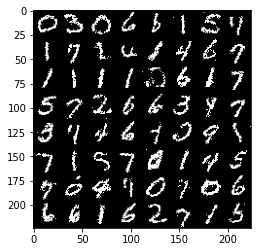

After removing 50% pixels


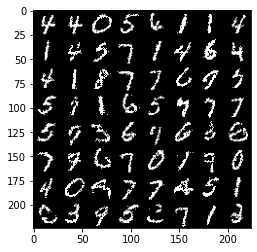

After removing 80% pixels


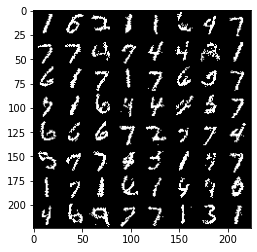

In [22]:
tf.compat.v1.disable_eager_execution()
train(train_data, 500,30)

# Problem 2

**VAE derivation:**

Let,

$X$:   data that we want to model <br />
$z$ :   latent variable <br />
$P(X)$:   probability distribution of the data <br />
$P(z)$:   probability distribution of latent variable <br />
$P(X|z)$:   distribution of generating data given latent variable <br />

Our objective here is to model the data, hence we want to find P(X).Using the law of probability, we could find it in relation with z as follows:

$P(X) = \int P(X \vert z) P(z) dz$

But the problem arises since the integral is intractible. So our aim is to approximate $P(z|X)$ by $Q(z|X)$ using variational inference.

let’s say we want to infer P(z|X) using Q(z|X).The KL divergence then formulated as follows:

$D_{KL}Q(z \vert X) \Vert P(z \vert X) = \sum_z Q(z \vert X) \, \log \frac{Q(z \vert X)}{P(z \vert X)} \\
                            = E [ \log \frac{Q(z \vert X)}{P(z \vert X)}] \\
                            = E[\log Q(z \vert X) - \log P(z \vert X)]$
                            
Using Bayes Rule:

$D_{KL}Q(z \vert X) \Vert P(z \vert X) = E[\log Q(z \vert X) - \log \frac{P(X \vert z) P(z)}{P(X)})]\\
                                      = E[\log Q(z \vert X) - \log P(X \vert z) - \log P(z) + \log P(X)]$
                                      
As P(X) is independent of z we move it outside the expectation term, this gives us the following:

$D_{KL}[Q(z \vert X) \Vert P(z \vert X)]  = E[\log Q(z \vert X) - \log P(X \vert z) - \log P(z)] +  \log P(X)$ 

                                      
$D_{KL}[Q(z \vert X) \Vert P(z \vert X)] - \log P(X) = E[\log Q(z \vert X) - \log P(X \vert z) - \log P(z)]$

On looking at the right hand side of the equation, we would notice that it could be rewritten as another KL divergence:

$\log P(X) - D_{KL}[Q(z \vert X) \Vert P(z \vert X)] = E[\log P(X \vert z) - (\log Q(z \vert X) - \log P(z))] \\
                                       = E[\log P(X \vert z)] - E[\log Q(z \vert X) - \log P(z)] \\
                                       = E[\log P(X \vert z)] - D_{KL}[Q(z \vert X) \Vert P(z)]$

Thus we get the **VAE objective function** as:

$\log P(X) - D_{KL}[Q(z \vert X) \Vert P(z \vert X)] = E[\log P(X \vert z)] - D_{KL}[Q(z \vert X) \Vert P(z)]$

We have the following 3 steps:

1. Learn $Q(z|X)$ by transforming data X into z i.e. the Encoder module.
2. Learn $P(z)$ i.e. distribution of latent space.
3. Generate new data from z $P(X|z)$ i.e. the Decoder module.

Maximizing $E[\log P(X \vert z)]$ is a maximum likelihood estimation. However for the other term $D_{KL}[Q(z \vert X) \Vert P(z)]$, $P(z)$ is the latent variable distribution. When sampling $P(z)$ the easiest choice is N(0,1). Hence, $Q(z|X)$ must be close to N(0,1). Also then, the KL divergence between those two distribution could be computed in closed form.


$D_{KL}[N(\mu(X), \Sigma(X)) \Vert N(0, 1)] = \frac{1}{2} ( \sum_k \Sigma(X) + \sum_k \mu^2(X) - \sum_k 1 - \log \prod_k \Sigma(X) ) \\
= \frac{1}{2} \sum_k ( \Sigma(X) + \mu^2(X) - 1 - \log \Sigma(X))$

In practice, however, it’s better to model $\sigma(X)$ as $\log \sigma(X)$, as it is more numerically stable to take exponent compared to computing log. Hence, our final KL divergence term is:

$D_{KL}[N(\mu(X), \Sigma(X)) \Vert N(0, 1)] = \frac{1}{2} \sum_k ( \exp(\Sigma(X)) + \mu^2(X) - 1 - \Sigma(X))$


**Reparameterization trick** is used to divert the non-differentiable operation out of the network, so that, even though we still involve a thing that is non-differentiable, at least it is out of the network, hence the network could still be trained. The reparameterization trick is as follows.
If we sample from a standard normal distribution, we could convert it to any Gaussian we want if we know the mean and the variance. Hence we could implement our sampling operation of z by:

$z = \mu(X) + \Sigma^{\frac{1}{2}}(X) \epsilon$

where $\epsilon \sim N(0, 1)$

During backpropagation, we don’t care anymore with the sampling process, as it is now outside of the network, i.e. doesn’t depend on anything in the net, hence the gradient won’t flow through it.

In [0]:
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

In [0]:
def sampling(args):

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


In [0]:
def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    
    encoder, decoder = models
    x_test, y_test = data
    
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-3, 3, n)
    grid_y = np.linspace(-3, 3, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.imshow(figure, cmap='Greys_r')
    plt.show()


In [0]:
def vae(latent_dim):

  inputs = Input(shape=input_shape, name='encoder_input')
  x = Dense(intermediate_dim, activation='relu')(inputs)
  z_mean = Dense(latent_dim, name='z_mean')(x)
  z_log_var = Dense(latent_dim, name='z_log_var')(x)


  z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

  # instantiate encoder model
  encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
  encoder.summary()


  # build decoder model
  latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
  x = Dense(intermediate_dim, activation='relu')(latent_inputs)
  outputs = Dense(original_dim, activation='sigmoid')(x)

  # instantiate decoder model
  decoder = Model(latent_inputs, outputs, name='decoder')
  decoder.summary()


  # instantiate VAE model
  outputs = decoder(encoder(inputs)[2])
  vae = Model(inputs, outputs, name='vae_mlp')
  vae.summary()


  models = (encoder, decoder)
  data = (x_test, y_test)

  reconstruction_loss = mse(inputs, outputs)
  reconstruction_loss *= original_dim
  kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5
  vae_loss = K.mean(reconstruction_loss + kl_loss)
  vae.add_loss(vae_loss)
  vae.compile(optimizer='adam')
  vae.summary()
    
  vae.fit(x_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test, None))

  if latent_dim==2:
    plot_results(models,data,batch_size=batch_size,model_name="vae_mlp")

  return vae


  

In [0]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 256
batch_size = 128
latent_dim = 2
epochs = 30

In [0]:
original_dim,intermediate_dim

(784, 256)

**Code units=2 and generated images by varying latent variables from -3 to 3**

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            514         dense_1[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 58us/step - loss: 55.0477 - val_loss: 45.6592
Epoch 2/30
60000/60000 [==============================] - 2s 33us/step - loss: 44.0658 - val_loss: 43.2927
Epoch 3/30
60000/60000 [==============================] - 2s 33us/step - loss: 42.7544 - val_loss: 42.5227
Epoch 4/30
60000/60000 [==============================] - 2s 33us/step - loss: 42.1759 - val_loss: 41.9824
Epoch 5/30
60000/60000 [==============================] - 2s 33us/step - loss: 41.7146 - val_loss: 41.5494
Epoch 6/30
60000/60000 [==============================] - 2s 33us/step - loss: 41.3244 - val_loss: 41.1091
Epoch 7/30
60000/60000 [==============================] - 2s 33us/step - loss: 40.9802 - val_loss: 40.8690
Epoch 8/30
60000/60000 [==============================] - 2s 34us/step - loss: 40.6434 - val_loss: 40.5432
Epoch 9/30
60000/60000 [==============================] - 2s 33us/step - loss: 40.3415 - val_l

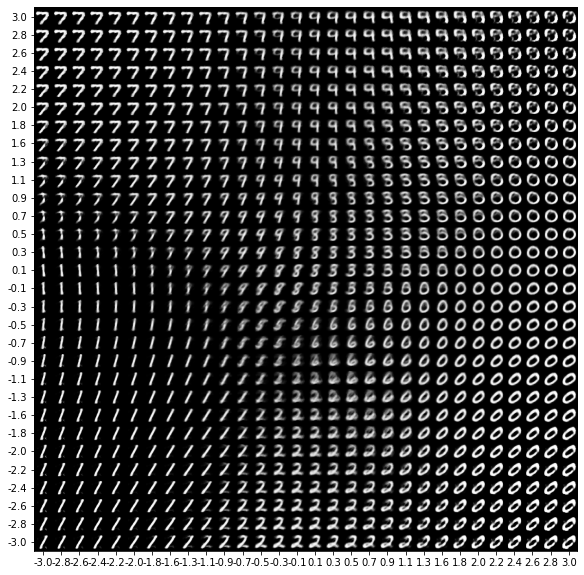

In [0]:
model=vae(2)

In [0]:
inference=model.predict(x_test)

In [0]:
inference.shape

(10000, 784)

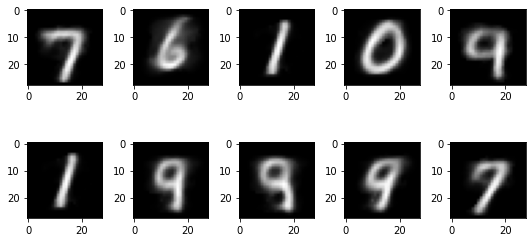

In [0]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(inference[i].reshape(28,28), cmap='gray')
plt.tight_layout()
plt.show()

**Code units=8**

In [0]:
model=vae(8)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 8)            2056        dense_4[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 8)            2056        dense_4[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 61us/step - loss: 48.4368 - val_loss: 37.5004
Epoch 2/30
60000/60000 [==============================] - 2s 33us/step - loss: 36.1297 - val_loss: 34.7652
Epoch 3/30
60000/60000 [==============================] - 2s 32us/step - loss: 34.4447 - val_loss: 33.6796
Epoch 4/30
60000/60000 [==============================] - 2s 33us/step - loss: 33.5777 - val_loss: 33.0398
Epoch 5/30
60000/60000 [==============================] - 2s 33us/step - loss: 32.9973 - val_loss: 32.4594
Epoch 6/30
60000/60000 [==============================] - 2s 33us/step - loss: 32.5824 - val_loss: 32.2101
Epoch 7/30
60000/60000 [==============================] - 2s 33us/step - loss: 32.2896 - val_loss: 32.0000
Epoch 8/30
60000/60000 [==============================] - 2s 33us/step - loss: 31.9871 - val_loss: 31.7186
Epoch 9/30
60000/60000 [==============================] - 2s 33us/step - loss: 31.7781 - val_l

In [0]:
inference=model.predict(x_test)

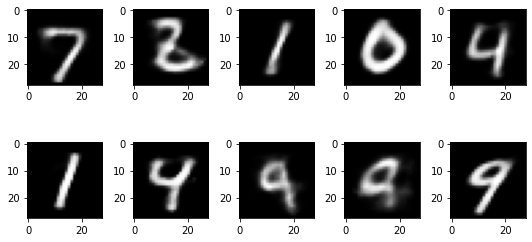

In [0]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(inference[i].reshape(28,28), cmap='gray')
plt.tight_layout()
plt.show()

**Code units=16**

In [0]:
model=vae(16)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 16)           4112        dense_7[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 16)           4112        dense_7[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 62us/step - loss: 49.0297 - val_loss: 37.7708
Epoch 2/30
60000/60000 [==============================] - 2s 32us/step - loss: 36.0786 - val_loss: 34.4709
Epoch 3/30
60000/60000 [==============================] - 2s 33us/step - loss: 33.9707 - val_loss: 33.1215
Epoch 4/30
60000/60000 [==============================] - 2s 32us/step - loss: 32.9443 - val_loss: 32.2671
Epoch 5/30
60000/60000 [==============================] - 2s 32us/step - loss: 32.3295 - val_loss: 31.7344
Epoch 6/30
60000/60000 [==============================] - 2s 33us/step - loss: 31.9197 - val_loss: 31.4109
Epoch 7/30
60000/60000 [==============================] - 2s 33us/step - loss: 31.6239 - val_loss: 31.1337
Epoch 8/30
60000/60000 [==============================] - 2s 32us/step - loss: 31.3720 - val_loss: 31.0695
Epoch 9/30
60000/60000 [==============================] - 2s 31us/step - loss: 31.1935 - val_l

In [0]:
inference=model.predict(x_test)

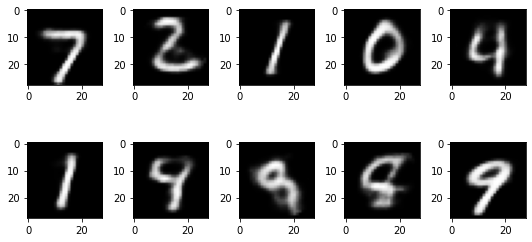

In [0]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(inference[i].reshape(28,28), cmap='gray')
plt.tight_layout()
plt.show()

# Problem 3

In [0]:
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten, Lambda
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

Using TensorFlow backend.


**Load MNIST data**

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]

train_len = 10000
test_len = 1000
x_train = np.reshape(x_train[:train_len], [-1, image_size, image_size, 1])
x_test = np.reshape(x_test[:test_len], [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_test = y_test[:test_len]

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [0]:
def plot_results(encoder, decoder, x_test, y_test, batch_size=128):
    
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

**Hyperparameters**

In [0]:
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
filters = 16
latent_dim = 2
epochs = 30
use_mse = True

**Encoder with CNN**

In [0]:
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
for i in range(2):
    filters *= 2
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

# shape info needed to build decoder model
shape = K.int_shape(x)

# generate latent vector Q(z|X)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 64)     18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 3136)         0           conv2d_2[0][0]                   
____________________________________________________________________________________________

**Decoder with CNN**

In [0]:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

# use Conv2DTranspose to reverse the conv layers from the encoder
for i in range(2):
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)
    filters //= 2

outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

**VAE**

In [0]:
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

In [0]:
if use_mse:
    reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
else:
    reconstruction_loss = binary_crossentropy(K.flatten(inputs),
                                              K.flatten(outputs))

reconstruction_loss *= image_size * image_size
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

In [0]:
vae.compile(optimizer='rmsprop')
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 69076     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         65089     
Total params: 134,165
Trainable params: 134,165
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


In [0]:
vae.fit(x_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test, None))

Train on 10000 samples, validate on 1000 samples
Epoch 1/30
10000/10000 [==============================] - 8s 827us/step - loss: 53.3987 - val_loss: 44.6226
Epoch 2/30
10000/10000 [==============================] - 2s 191us/step - loss: 44.6895 - val_loss: 42.9474
Epoch 3/30
10000/10000 [==============================] - 2s 189us/step - loss: 43.3248 - val_loss: 43.7992
Epoch 4/30
10000/10000 [==============================] - 2s 192us/step - loss: 42.6410 - val_loss: 42.1521
Epoch 5/30
10000/10000 [==============================] - 2s 191us/step - loss: 42.1135 - val_loss: 42.8118
Epoch 6/30
10000/10000 [==============================] - 2s 193us/step - loss: 41.5962 - val_loss: 41.5368
Epoch 7/30
10000/10000 [==============================] - 2s 193us/step - loss: 41.1892 - val_loss: 40.6660
Epoch 8/30
10000/10000 [==============================] - 2s 190us/step - loss: 40.7682 - val_loss: 40.8434
Epoch 9/30
10000/10000 [==============================] - 2s 189us/step - loss: 40.4491

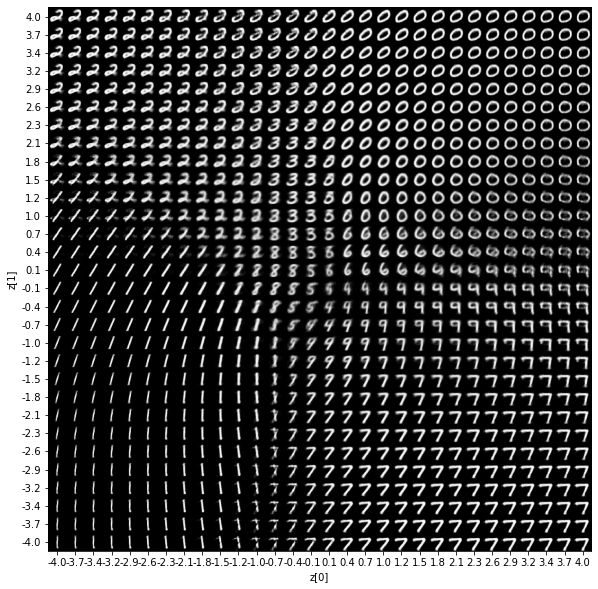

In [0]:
plot_results(encoder, decoder, x_test, y_test, batch_size=batch_size)

# Problem 4

Generative Adversarial Network consists of two models: a **generative model** G and a **discriminative model** D.The discriminator is responsible for distinguishing between theactual and generated data while the generator tries createing data in a way to fool the discriminator.

On using cross entropy loss function:

$L(y,\hat{y})=(y \log \hat{y})+((1-y) \log (1-\hat{y}))$

While training the discriminator label of data coming from $P_{data}(x)$ is y=1 and $\hat{y}= D(x)$ thus the loss we get is:

$L(D(x),1)= \log(D(x))$

Since the data for the generator is fake, therefore  y=0 and $\hat{y}= D(G(z))$

So $L(D(G(z)),0)= \log(1-D(G(z)))$

The Objective of discriminator is to classify real and fake data.

The loss function of the generator model is :-

$L^{(G)}=min[\log(D(x))+\log(1-D(G(z)))]$

The loss function of the Discriminator model is :-

$L^{(D)}=max[\log(D(x))+\log(1-D(G(z)))]$

Therefore  the **Combined loss function**  is:

$L=min_{G} max_{D} [E_{x \sim P_{data}(x) }[\log(D(x))]+ E_{z\sim P(z)}[\log(1-D(G(z)))]]$

Thus, we can update the discriminator model based on ascending the stochastic gradient descent while update the generator model by descending the stochastic gradient descent.

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)

# prepare data loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!






**Discriminator**

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim*4)
        self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3)
        
        
    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28)
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer
        out = self.fc4(x)

        return out

**Generator**

In [0]:
class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim*4, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = torch.tanh(self.fc4(x))

        return out

**Hyperparameters**

In [0]:
# Discriminator hyperparams

# Size of input image to discriminator (28*28)
input_size = 784
# Size of discriminator output (real or fake)
d_output_size = 1
# Size of last hidden layer in the discriminator
d_hidden_size = 32

# Generator hyperparams

# Size of latent vector to give to generator
z_size = 100
# Size of discriminator output (generated image)
g_output_size = 784
# Size of first hidden layer in the generator
g_hidden_size = 32

**GAN model**

In [0]:
D = Discriminator(input_size, d_hidden_size, d_output_size)
G = Generator(z_size, g_hidden_size, g_output_size)


print(D)
print()
print(G)


Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Generator(
  (fc1): Linear(in_features=100, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [0]:
# Calculate losses
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
        
    # numerically stable loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [0]:
import torch.optim as optim

# Optimizers
lr = 0.002

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)

**Training**

In [0]:
# training hyperparams
num_epochs = 50

# keep track of loss and generated, "fake" samples
samples = []
losses = []

print_every = 400

# Get some fixed data for sampling. These are images that are held
# constant throughout training, and allow us to inspect the model's performance
sample_size=16
fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
fixed_z = torch.from_numpy(fixed_z).float()

# train the network
D.train()
G.train()
for epoch in range(num_epochs):
    
    for batch_i, (real_images, _) in enumerate(train_loader):
                
        batch_size = real_images.size(0)
        
        ## Important rescaling step ## 
        real_images = real_images*2 - 1  # rescale input images from [0,1) to [-1, 1)
        
        d_optimizer.zero_grad()
        
        # 1. Train with real images

        # Compute the discriminator losses on real images 
        # smooth the real labels
        D_real = D(real_images)
        d_real_loss = real_loss(D_real, smooth=True)
        
        # 2. Train with fake images
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images        
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)
        
        # add up loss and perform backprop
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()
        
        
        g_optimizer.zero_grad()
        
        # 1. Train with fake images and flipped labels
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images 
        # using flipped labels!
        D_fake = D(fake_images)
        g_loss = real_loss(D_fake) # use real loss to flip labels
        
        # perform backprop
        g_loss.backward()
        g_optimizer.step()

        # Print some loss stats
        if batch_i % print_every == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    
    ## AFTER EACH EPOCH##
    # append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))
    
    # generate and save sample, fake images
    G.eval() # eval mode for generating samples
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # back to train mode

Epoch [    1/   50] | d_loss: 1.4199 | g_loss: 0.6122
Epoch [    1/   50] | d_loss: 1.6515 | g_loss: 1.4794
Epoch [    1/   50] | d_loss: 1.0764 | g_loss: 2.1332
Epoch [    2/   50] | d_loss: 1.1537 | g_loss: 1.1083
Epoch [    2/   50] | d_loss: 1.2909 | g_loss: 0.6969
Epoch [    2/   50] | d_loss: 1.6127 | g_loss: 0.5472
Epoch [    3/   50] | d_loss: 1.2701 | g_loss: 0.8140
Epoch [    3/   50] | d_loss: 1.1618 | g_loss: 0.9189
Epoch [    3/   50] | d_loss: 1.2258 | g_loss: 2.5967
Epoch [    4/   50] | d_loss: 1.2586 | g_loss: 1.2860
Epoch [    4/   50] | d_loss: 1.0651 | g_loss: 1.5339
Epoch [    4/   50] | d_loss: 1.0524 | g_loss: 1.2302
Epoch [    5/   50] | d_loss: 1.1280 | g_loss: 1.0989
Epoch [    5/   50] | d_loss: 1.2278 | g_loss: 1.2629
Epoch [    5/   50] | d_loss: 1.4973 | g_loss: 0.7280
Epoch [    6/   50] | d_loss: 1.2898 | g_loss: 1.1424
Epoch [    6/   50] | d_loss: 1.3041 | g_loss: 0.9609
Epoch [    6/   50] | d_loss: 1.4286 | g_loss: 0.8839
Epoch [    7/   50] | d_loss

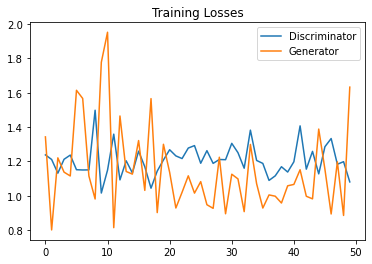

In [0]:
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()

In [0]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')


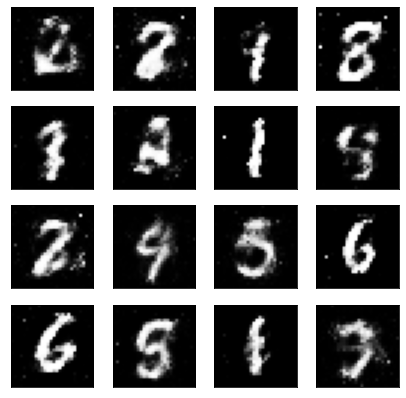

In [0]:
# -1 indicates final epoch's samples (the last in the list)
view_samples(-1, samples)

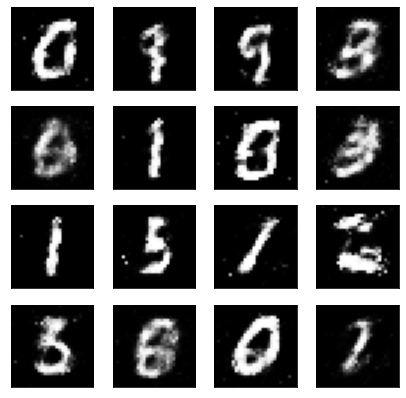

In [0]:
# randomly generated, new latent vectors
sample_size=16
rand_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
rand_z = torch.from_numpy(rand_z).float()

G.eval() # eval mode
# generated samples
rand_images = G(rand_z)

# 0 indicates the first set of samples in the passed in list
# and we only have one batch of samples, here
view_samples(0, [rand_images])


**References :**

https://www.kaggle.com/vincentman0403/vae-with-convolution-on-mnist

https://medium.com/intel-student-ambassadors/mnist-gan-detailed-step-by-step-explanation-implementation-in-code-ecc93b22dc60

https://keras.io/examples/variational_autoencoder/

http://lyy1994.github.io/machine-learning/2017/04/17/RBM-tensorflow-implementation.html

https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/

http://lyy1994.github.io/machine-learning/2017/03/16/EBM-Notes.html